In [1]:
import os
import tensorflow as tf
from tensorflow.keras import models, layers 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from process_data import process_data

In [2]:
data = process_data()

In [3]:
for k, v in data.items():
    print(k)
    print(type(v))

x_train
<class 'numpy.ndarray'>
x_train_processed
<class 'numpy.ndarray'>
x_test
<class 'numpy.ndarray'>
x_test_processed
<class 'numpy.ndarray'>
y_train
<class 'numpy.ndarray'>
y_test
<class 'numpy.ndarray'>
pipeline
<class 'sklearn.pipeline.Pipeline'>


In [4]:
x_train_processed = data['x_train_processed']
y_train = data['y_train']

In [5]:
x_train_processed.shape

(1047, 11)

In [6]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(x_train_processed.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(
    x_train_processed, 
    y_train, 
    epochs=100, 
    batch_size=16, 
    verbose=1,
    validation_split=.2)

Epoch 1/100
53/53 [==============================] - 1s 11ms/step - loss: 0.5829 - accuracy: 0.7288 - val_loss: 0.5891 - val_accuracy: 0.7000
Epoch 2/100
53/53 [==============================] - 0s 7ms/step - loss: 0.4898 - accuracy: 0.7993 - val_loss: 0.5687 - val_accuracy: 0.7238
Epoch 3/100
53/53 [==============================] - 0s 8ms/step - loss: 0.4582 - accuracy: 0.7981 - val_loss: 0.5621 - val_accuracy: 0.7238
Epoch 4/100
53/53 [==============================] - 1s 10ms/step - loss: 0.4431 - accuracy: 0.8041 - val_loss: 0.5687 - val_accuracy: 0.7333
Epoch 5/100
53/53 [==============================] - 1s 14ms/step - loss: 0.4347 - accuracy: 0.8029 - val_loss: 0.5381 - val_accuracy: 0.7381
Epoch 6/100
53/53 [==============================] - 0s 6ms/step - loss: 0.4284 - accuracy: 0.8076 - val_loss: 0.5426 - val_accuracy: 0.7381
Epoch 7/100
53/53 [==============================] - 0s 8ms/step - loss: 0.4240 - accuracy: 0.8136 - val_loss: 0.5113 - val_accuracy: 0.7429
Epoch 8/10

<AxesSubplot:>

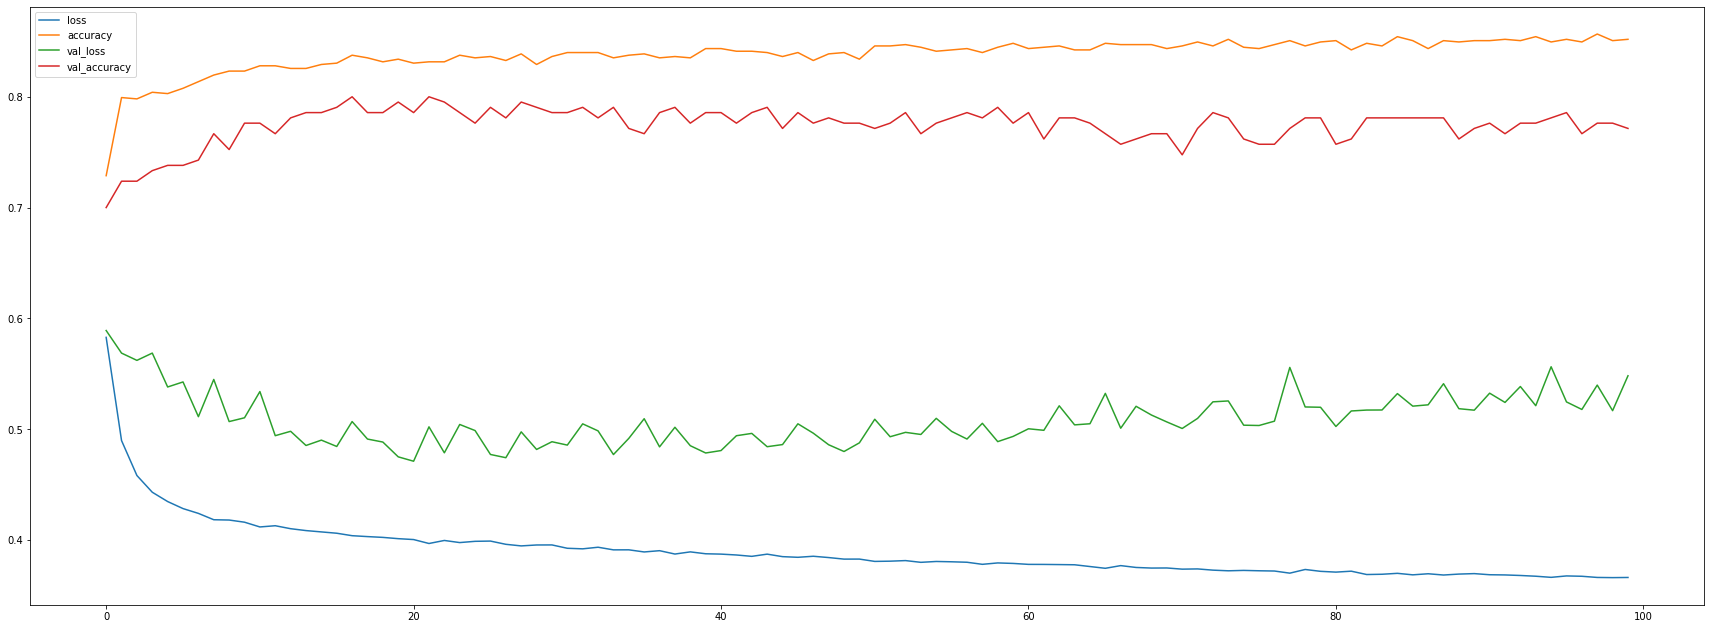

In [18]:
#epochs = range(len(history.history['loss']))
#loss = history.history['loss']

df = pd.DataFrame(data=history.history)

df.plot(figsize=(30, 11))

In [24]:
model.evaluate(data['x_test_processed'], data['y_test'])

9/9 [==============================] - 0s 15ms/step - loss: 0.5388 - accuracy: 0.7595


[0.538759171962738, 0.7595419883728027]

In [23]:
data['y_test']

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1.